In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
price_and_demand = pd.read_csv("price_and_demand.csv")
price_and_demand

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,1/11/2022 0:30,4178.18,8.94,TRADE
1,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
2,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
3,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
4,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE
...,...,...,...,...,...
8347,VIC1,23/04/2023 22:00,4717.55,84.09,TRADE
8348,VIC1,23/04/2023 22:30,4520.39,81.25,TRADE
8349,VIC1,23/04/2023 23:00,4472.49,93.97,TRADE
8350,VIC1,23/04/2023 23:30,4621.36,83.96,TRADE


In [3]:
# Check datatype of the dataframe
price_and_demand.dtypes

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

In [4]:
# check if there is any mising data
price_and_demand.isna().sum()

REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64

In [5]:
# Convert "SETTLEMENTDATE" column to datetime
price_and_demand["SETTLEMENTDATE"] = pd.to_datetime(price_and_demand["SETTLEMENTDATE"], format="%d/%m/%Y %H:%M")

In [6]:
# Extract date from "SETTLEMENTDATE" and create a new 'Date' column
price_and_demand['Date'] = price_and_demand['SETTLEMENTDATE'].dt.date

In [7]:
price_and_demand.sample(20)

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,Date
5317,VIC1,2023-02-19 19:00:00,5691.17,145.71,TRADE,2023-02-19
7119,VIC1,2023-03-29 08:00:00,5354.59,162.02,TRADE,2023-03-29
20,VIC1,2022-11-01 10:30:00,3870.49,-7.84,TRADE,2022-11-01
3143,VIC1,2023-01-05 12:00:00,3071.50,-58.00,TRADE,2023-01-05
3176,VIC1,2023-01-06 04:30:00,3776.08,0.02,TRADE,2023-01-06
6840,VIC1,2023-03-23 12:30:00,4303.50,79.72,TRADE,2023-03-23
349,VIC1,2022-11-08 07:00:00,4843.78,88.67,TRADE,2022-11-08
1175,VIC1,2022-11-25 12:00:00,3597.46,0.02,TRADE,2022-11-25
3177,VIC1,2023-01-06 05:00:00,3877.13,8.94,TRADE,2023-01-06
2486,VIC1,2022-12-22 19:30:00,5141.42,105.16,TRADE,2022-12-22


In [8]:
# Calculate maximum daily energy demand and average rrp
max_edemand = price_and_demand.groupby("Date")['TOTALDEMAND'].max()
mean_rrp = price_and_demand.groupby("Date")['RRP'].mean().round(2)

In [9]:
mean_rrp

Date
2022-11-01     -3.76
2022-11-02     -2.52
2022-11-03     63.21
2022-11-04    110.94
2022-11-05     72.96
               ...  
2023-04-20    130.71
2023-04-21    131.46
2023-04-22     80.39
2023-04-23     63.21
2023-04-24     63.77
Name: RRP, Length: 175, dtype: float64

In [10]:
weather = pd.read_csv("weather.csv", encoding='latin-1')
weather

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,NaN,NaN,SW,44.0,11:36,...,NaN,NW,13,991.3,13.2,59.0,NaN,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,NaN,NaN,SSW,43.0,11:33,...,NaN,W,9,1006.7,15.1,54.0,NaN,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,NaN,NaN,SSW,31.0,8:07,...,NaN,SSW,9,1019.2,13.8,67.0,NaN,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,NaN,NaN,S,24.0,14:50,...,NaN,WSW,6,1028.1,16.9,56.0,NaN,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,NaN,NaN,N,31.0,11:58,...,NaN,N,9,1026.3,18.8,65.0,NaN,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,NaN,NaN,SSW,17.0,12:47,...,NaN,NNE,7,1026.8,17.5,58.0,NaN,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,NaN,NaN,SSW,13.0,10:48,...,NaN,NE,6,1030.5,18.6,64.0,NaN,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,NaN,NaN,SSW,22.0,16:09,...,NaN,SW,6,1031.9,18.8,64.0,NaN,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,NaN,NaN,SSW,26.0,15:45,...,NaN,SSE,7,1034.4,17.8,71.0,NaN,SSW,13.0,1032.4


In [11]:
weather.dtypes

Location                              object
Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)              int64
9am cloud amount (oktas)             float64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm cloud amount (oktas)             float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: obj

In [12]:
weather.isna().sum()

Location                               0
Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               1
Rainfall (mm)                          0
Evaporation (mm)                     175
Sunshine (hours)                     175
Direction of maximum wind gust         1
Speed of maximum wind gust (km/h)      1
Time of maximum wind gust              1
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)             175
9am wind direction                     0
9am wind speed (km/h)                  0
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   1
3pm relative humidity (%)              1
3pm cloud amount (oktas)             175
3pm wind direction                     1
3pm wind speed (km/h)                  1
3pm MSL pressure (hPa)                 1
dtype: int64

## Data Cleaning across entire weather dataframe

In [13]:
#Removing entirely empty columns
weather = weather.dropna(axis = 1, how = 'all')
weather.head()

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2


In [14]:
missing_value = weather[["Minimum temperature (°C)", "Maximum temperature (°C)", "Rainfall (mm)", "Speed of maximum wind gust (km/h)", "3pm relative humidity (%)", "3pm MSL pressure (hPa)"]] .isnull()
missing_value

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),3pm relative humidity (%),3pm MSL pressure (hPa)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
170,False,False,False,False,False,False
171,False,False,False,False,False,False
172,False,False,False,False,False,False
173,False,False,False,False,False,False


In [15]:
#use the .loc accessor to explicitly set the date format for the specified column to match. 
weather.loc[:, "Date"] = pd.to_datetime(weather['Date'], format="%d/%m/%Y")

#Replacing all occurrences of 'Calm' windspeed with 0 km/h, and setting Date as the ID Column
weather = weather.set_index('Date')
weather

,Location,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,
2022-11-01,"Melbourne (Olympic Park), Victoria",8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
2022-11-02,"Melbourne (Olympic Park), Victoria",6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2022-11-03,"Melbourne (Olympic Park), Victoria",9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
2022-11-04,"Melbourne (Olympic Park), Victoria",10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
2022-11-05,"Melbourne (Olympic Park), Victoria",11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-20,"Melbourne (Olympic Park), Victoria",7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
2023-04-21,"Melbourne (Olympic Park), Victoria",11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
2023-04-22,"Melbourne (Olympic Park), Victoria",14.6,19.2,0.0,SSW,22.0,16:09,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7


In [17]:
#Replacing all occurrences of 'Calm' windspeed with 0 km/h
weather_nocalm = weather.replace("Calm",0)
weather_nocalm

,Location,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,
2022-11-01,"Melbourne (Olympic Park), Victoria",8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
2022-11-02,"Melbourne (Olympic Park), Victoria",6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2022-11-03,"Melbourne (Olympic Park), Victoria",9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
2022-11-04,"Melbourne (Olympic Park), Victoria",10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
2022-11-05,"Melbourne (Olympic Park), Victoria",11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-20,"Melbourne (Olympic Park), Victoria",7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
2023-04-21,"Melbourne (Olympic Park), Victoria",11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
2023-04-22,"Melbourne (Olympic Park), Victoria",14.6,19.2,0.0,SSW,22.0,16:09,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7


In [18]:
#Replacing all wind directions with True Bearing quantities
weather_bearings = weather_nocalm.replace(['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW'],
                                          [0,22.5,45,67.5,90,112.5,135,157.5,180,202.5,225,247.5,270,292.5,315,337.5])
#Renaming Columns with True Bearing Units
weather_bearings.rename(columns = {'Direction of maximum wind gust ':'Direction of maximum wind gust (°T)', '9am wind direction':'9am wind direction (°T)','3pm wind direction':'3pm wind direction (°T)'},inplace = True)

#Data Cleaning Complete
processed_data = weather_bearings

processed_data

,Location,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust (°T),Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction (°T),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction (°T),3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,
2022-11-01,"Melbourne (Olympic Park), Victoria",8.5,13.3,3.0,225.0,44.0,11:36,12.0,64,315,13,991.3,13.2,59.0,292.5,11.0,991.5
2022-11-02,"Melbourne (Olympic Park), Victoria",6.9,15.7,2.8,202.5,43.0,11:33,11.0,65,270,9,1006.7,15.1,54.0,202.5,13.0,1008.4
2022-11-03,"Melbourne (Olympic Park), Victoria",9.1,15.4,0.4,202.5,31.0,8:07,11.5,70,202.5,9,1019.2,13.8,67.0,202.5,9.0,1021.3
2022-11-04,"Melbourne (Olympic Park), Victoria",10.2,17.8,0.2,180.0,24.0,14:50,12.3,84,247.5,6,1028.1,16.9,56.0,225.0,9.0,1026.6
2022-11-05,"Melbourne (Olympic Park), Victoria",11.8,22.7,0.0,0.0,31.0,11:58,14.0,78,0,9,1026.3,18.8,65.0,225.0,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-20,"Melbourne (Olympic Park), Victoria",7.8,18.5,0.0,202.5,17.0,12:47,12.4,72,22.5,7,1026.8,17.5,58.0,225.0,4.0,1025.5
2023-04-21,"Melbourne (Olympic Park), Victoria",11.3,19.0,0.0,202.5,13.0,10:48,14.8,78,45,6,1030.5,18.6,64.0,157.5,2.0,1029.2
2023-04-22,"Melbourne (Olympic Park), Victoria",14.6,19.2,0.0,202.5,22.0,16:09,15.2,84,225,6,1031.9,18.8,64.0,202.5,11.0,1029.7


In [27]:
#Selecting key features based on 'expert' insight and desired focus variables
selected_features = ["Minimum temperature (°C)", "Maximum temperature (°C)", "9am relative humidity (%)","3pm relative humidity (%)","Rainfall (mm)", "Speed of maximum wind gust (km/h)", "9am wind speed (km/h)", "9am MSL pressure (hPa)", "3pm MSL pressure (hPa)"]
# selected_features = ["Maximum temperature (°C)", "3pm relative humidity (%)"]
selected_features

selected_data = processed_data[selected_features]

#Checking for missing values across selected features
missing_rows = selected_data.index[selected_data.isnull().any(axis=1)]
print("Rows with missing values:", missing_rows)

missing_columns = selected_data.columns[selected_data.isnull().any()]
print("Columns with missing values:", missing_columns)

Rows with missing values: DatetimeIndex(['2023-04-24'], dtype='datetime64[ns]', name='Date', freq=None)
Columns with missing values: Index(['Maximum temperature (°C)', '3pm relative humidity (%)',
       'Speed of maximum wind gust (km/h)', '3pm MSL pressure (hPa)'],
      dtype='object')


In [29]:
#Removing data points with missing selected features
selected_data = processed_data[selected_features].dropna()
selected_data
#predictor_data = processed_data[selected_features].dropna()
#predictor_data

,Minimum temperature (°C),Maximum temperature (°C),9am relative humidity (%),3pm relative humidity (%),Rainfall (mm),Speed of maximum wind gust (km/h),9am wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa)
Date,,,,,,,,,
2022-11-01,8.5,13.3,64,59.0,3.0,44.0,13,991.3,991.5
2022-11-02,6.9,15.7,65,54.0,2.8,43.0,9,1006.7,1008.4
2022-11-03,9.1,15.4,70,67.0,0.4,31.0,9,1019.2,1021.3
2022-11-04,10.2,17.8,84,56.0,0.2,24.0,6,1028.1,1026.6
2022-11-05,11.8,22.7,78,65.0,0.0,31.0,9,1026.3,1023.2
...,...,...,...,...,...,...,...,...,...
2023-04-19,14.4,17.5,66,53.0,1.2,28.0,9,1022.0,1022.1
2023-04-20,7.8,18.5,72,58.0,0.0,17.0,7,1026.8,1025.5
2023-04-21,11.3,19.0,78,64.0,0.0,13.0,6,1030.5,1029.2


In [31]:
# Introducing Target Variables
selected_data["Average RRP"] = mean_rrp
selected_data["Maximum Energy Demand"] = max_edemand
selected_data

,Minimum temperature (°C),Maximum temperature (°C),9am relative humidity (%),3pm relative humidity (%),Rainfall (mm),Speed of maximum wind gust (km/h),9am wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa),Average RRP,Maximum Energy Demand
Date,,,,,,,,,,,
2022-11-01,8.5,13.3,64,59.0,3.0,44.0,13,991.3,991.5,-3.76,5627.52
2022-11-02,6.9,15.7,65,54.0,2.8,43.0,9,1006.7,1008.4,-2.52,6018.43
2022-11-03,9.1,15.4,70,67.0,0.4,31.0,9,1019.2,1021.3,63.21,6004.84
2022-11-04,10.2,17.8,84,56.0,0.2,24.0,6,1028.1,1026.6,110.94,5757.62
2022-11-05,11.8,22.7,78,65.0,0.0,31.0,9,1026.3,1023.2,72.96,4783.60
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-19,14.4,17.5,66,53.0,1.2,28.0,9,1022.0,1022.1,102.33,6042.88
2023-04-20,7.8,18.5,72,58.0,0.0,17.0,7,1026.8,1025.5,130.71,6084.21
2023-04-21,11.3,19.0,78,64.0,0.0,13.0,6,1030.5,1029.2,131.46,5903.60


## Scatter Plot Visualization

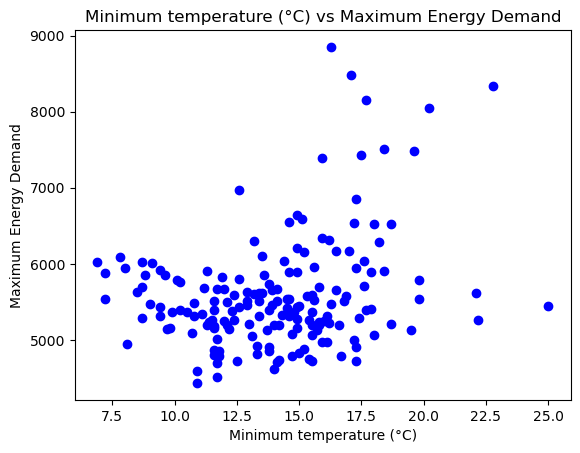

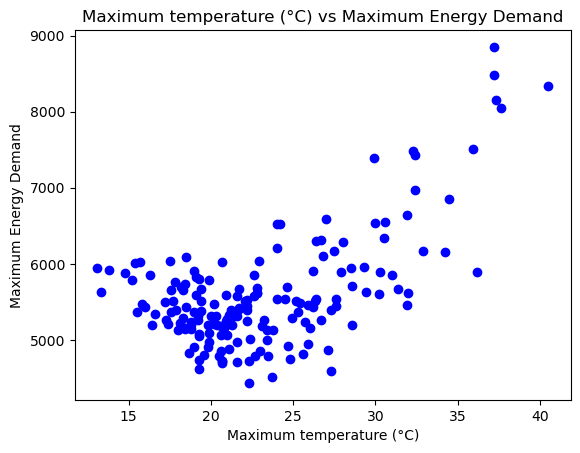

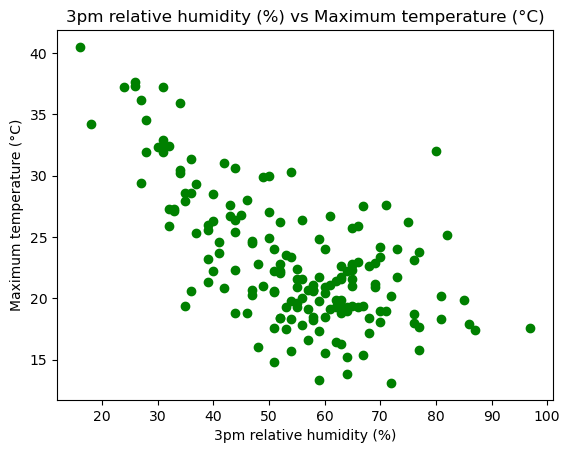

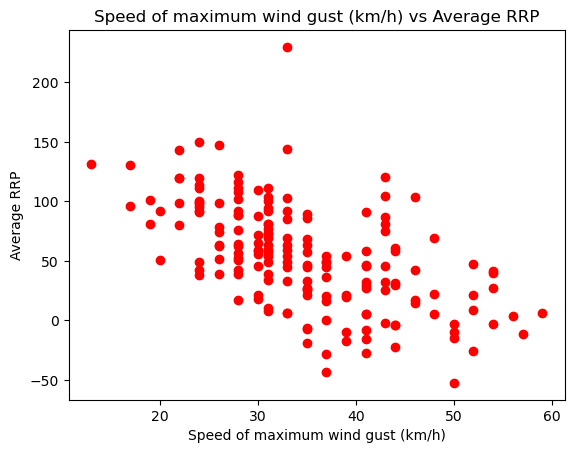

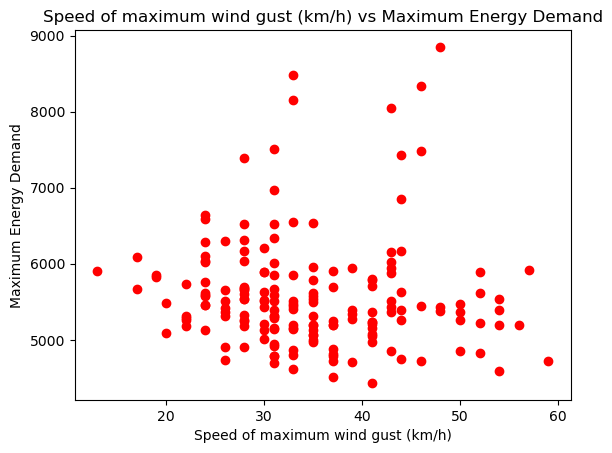

In [32]:
plot_x1 = "Minimum temperature (°C)"
plot_y1 = "Maximum Energy Demand"

plt.scatter(selected_data[plot_x1], selected_data[plot_y1], label="Data Points", color="blue")
plt.xlabel(plot_x1)
plt.ylabel(plot_y1)
plt.title(''.join([plot_x1," vs ",plot_y1]))
plt.show()

plot_x2 = "Maximum temperature (°C)"
plot_y2 = "Maximum Energy Demand"

plt.scatter(selected_data[plot_x2], selected_data[plot_y2], label="Data Points", color="blue")
plt.xlabel(plot_x2)
plt.ylabel(plot_y2)
plt.title(''.join([plot_x2," vs ",plot_y2]))
plt.show()

plot_x3 = "3pm relative humidity (%)"
plot_y3 = "Maximum temperature (°C)"

plt.scatter(selected_data[plot_x3], selected_data[plot_y3], label="Data Points", color="green")
plt.xlabel(plot_x3)
plt.ylabel(plot_y3)
plt.title(''.join([plot_x3," vs ",plot_y3]))
plt.show()

plot_x5 = "Speed of maximum wind gust (km/h)"
plot_y5 = "Average RRP"

plt.scatter(selected_data[plot_x5], selected_data[plot_y5], label="Data Points", color="red")
plt.xlabel(plot_x5)
plt.ylabel(plot_y5)
plt.title(''.join([plot_x5," vs ",plot_y5]))
plt.show()

plot_x6 = "Speed of maximum wind gust (km/h)"
plot_y6 = "Maximum Energy Demand"

plt.scatter(selected_data[plot_x6], selected_data[plot_y6], label="Data Points", color="red")
plt.xlabel(plot_x6)
plt.ylabel(plot_y6)
plt.title(''.join([plot_x6," vs ",plot_y6]))
plt.show()

## Regression Medel

In [35]:
"""Linear Regression Modeeling"""

# Regression model with all independent variables and target feature

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn import impute

display(selected_data.head())
X = selected_data[["Minimum temperature (°C)", "Maximum temperature (°C)", "9am relative humidity (%)", "3pm relative humidity (%)", "Rainfall (mm)", "Speed of maximum wind gust (km/h)", "9am wind speed (km/h)", "9am MSL pressure (hPa)", "3pm MSL pressure (hPa)"]]
Y = selected_data["Maximum Energy Demand"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

# Scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Instantiate
lm = linear_model.LinearRegression()
# Fit
lm.fit(X_train, y_train)
# Predict
y_pred = lm.predict(X_test)

print('actual RRP of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted RRP of the first 5 test data:')
print(y_pred[0:5])
print('')


,Minimum temperature (°C),Maximum temperature (°C),9am relative humidity (%),3pm relative humidity (%),Rainfall (mm),Speed of maximum wind gust (km/h),9am wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa),Average RRP,Maximum Energy Demand
Date,,,,,,,,,,,
2022-11-01,8.5,13.3,64,59.0,3.0,44.0,13,991.3,991.5,-3.76,5627.52
2022-11-02,6.9,15.7,65,54.0,2.8,43.0,9,1006.7,1008.4,-2.52,6018.43
2022-11-03,9.1,15.4,70,67.0,0.4,31.0,9,1019.2,1021.3,63.21,6004.84
2022-11-04,10.2,17.8,84,56.0,0.2,24.0,6,1028.1,1026.6,110.94,5757.62
2022-11-05,11.8,22.7,78,65.0,0.0,31.0,9,1026.3,1023.2,72.96,4783.60


actual RRP of the first 5 test data:
Date
2023-04-05    5731.10
2023-03-25    4803.80
2023-02-10    6317.41
2023-03-08    5378.45
2023-03-21    5672.06
Name: Maximum Energy Demand, dtype: float64

predicted RRP of the first 5 test data:
[5036.77275612 5231.6285973  5734.20423367 5001.21022566 5331.2084231 ]



In [36]:
# Evaluate

print("R2 score:", r2_score(y_test, y_pred)) # R2 is only tighted with linear regression!
print("RMSE score:", mean_squared_error(y_test, y_pred, squared=False))

R2 score: 0.18849099877282516
RMSE score: 574.835518936577


In [41]:
"""Decision Tree Regression Modeeling"""

from sklearn.tree import DecisionTreeRegressor

# Features (X) and target variable (y)
X = selected_data[["Minimum temperature (°C)", "Maximum temperature (°C)", "9am relative humidity (%)", "3pm relative humidity (%)", "Rainfall (mm)", "Speed of maximum wind gust (km/h)", "9am wind speed (km/h)", "9am MSL pressure (hPa)", "3pm MSL pressure (hPa)"]]
y = selected_data["Maximum Energy Demand"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("R2 score:", r2_score(y_test, y_pred))
print(f'Mean Squared Error: {mse}')
print("RMSE score: ", "{:.3f}".format(mean_squared_error(y_test, y_pred, squared = False)))

R2 score: 0.5770405998466389
Mean Squared Error: 172223.54745714282
RMSE score:  414.998


## KNN Model

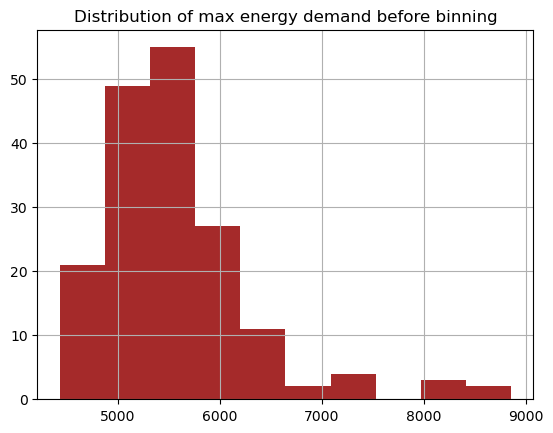

In [45]:
# checking distribution of max energy demand
selected_data["Maximum Energy Demand"].hist(color="brown")

plt.title("Distribution of max energy demand before binning")

plt.show()

In [46]:
selected_data["Maximum Energy Demand"].describe()

count     174.000000
mean     5592.053506
std       739.659403
min      4433.750000
25%      5188.285000
50%      5446.465000
75%      5848.355000
max      8850.610000
Name: Maximum Energy Demand, dtype: float64

In [49]:
# Try to bin max energy demand for knn or decision tree

def bin_energy(x):
    """
    We categorize average daily temp into following bins according to data distrubution and scatter plot:
    
        [min, 4900), [4900, 6200), [6200, max] 
        
    [] denote inclusive, () denote exclusive.
    """
    LOWER = 4900
    UPPER = 6200
    
    # [min, 4900)
    if x < LOWER:
        return 0
    # [4900, 6200)
    elif LOWER <= x < UPPER:
        return 1 
    # [6200, max] 
    return 2

# apply the function on the serie
selected_data.insert(loc = 11, column = "binned energy", value = selected_data["Maximum Energy Demand"].apply(bin_energy))

selected_data

,Minimum temperature (°C),Maximum temperature (°C),9am relative humidity (%),3pm relative humidity (%),Rainfall (mm),Speed of maximum wind gust (km/h),9am wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa),Average RRP,Maximum Energy Demand,binned energy
Date,,,,,,,,,,,,
2022-11-01,8.5,13.3,64,59.0,3.0,44.0,13,991.3,991.5,-3.76,5627.52,1
2022-11-02,6.9,15.7,65,54.0,2.8,43.0,9,1006.7,1008.4,-2.52,6018.43,1
2022-11-03,9.1,15.4,70,67.0,0.4,31.0,9,1019.2,1021.3,63.21,6004.84,1
2022-11-04,10.2,17.8,84,56.0,0.2,24.0,6,1028.1,1026.6,110.94,5757.62,1
2022-11-05,11.8,22.7,78,65.0,0.0,31.0,9,1026.3,1023.2,72.96,4783.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-19,14.4,17.5,66,53.0,1.2,28.0,9,1022.0,1022.1,102.33,6042.88,1
2023-04-20,7.8,18.5,72,58.0,0.0,17.0,7,1026.8,1025.5,130.71,6084.21,1
2023-04-21,11.3,19.0,78,64.0,0.0,13.0,6,1030.5,1029.2,131.46,5903.60,1


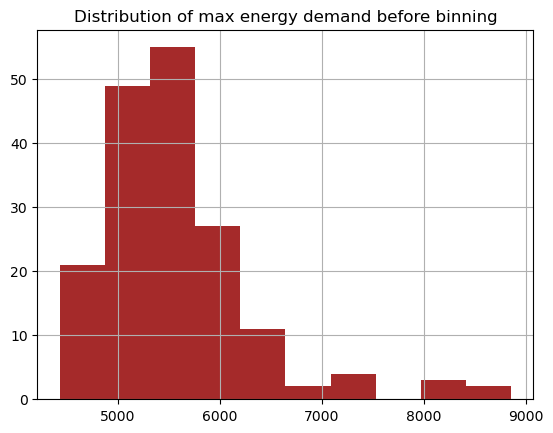

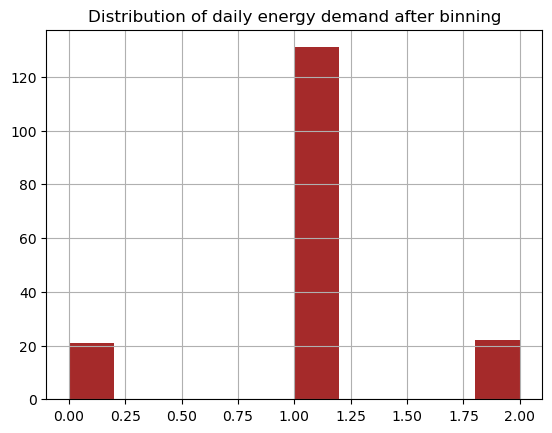

In [50]:
# check  and compare energy distribution before & after binning

selected_data["Maximum Energy Demand"].hist(color="brown")

plt.title("Distribution of max energy demand before binning")

plt.show()

selected_data['binned energy'].hist(color = "brown")

plt.title('Distribution of daily energy demand after binning')

plt.show()

In [56]:
""" KNN with all variables and target feature """

from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

display(selected_data.head())

features = selected_data[["Minimum temperature (°C)", "Maximum temperature (°C)", "9am relative humidity (%)", "3pm relative humidity (%)", "Rainfall (mm)", "Speed of maximum wind gust (km/h)", "9am wind speed (km/h)", "9am MSL pressure (hPa)", "3pm MSL pressure (hPa)"]]
classlabel = selected_data['binned energy']

#Splitting data to train and test sets 
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size=0.8, random_state=42)

#Scalling
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

#Fit
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, class_train)

,Minimum temperature (°C),Maximum temperature (°C),9am relative humidity (%),3pm relative humidity (%),Rainfall (mm),Speed of maximum wind gust (km/h),9am wind speed (km/h),9am MSL pressure (hPa),3pm MSL pressure (hPa),Average RRP,Maximum Energy Demand,binned energy
Date,,,,,,,,,,,,
2022-11-01,8.5,13.3,64,59.0,3.0,44.0,13,991.3,991.5,-3.76,5627.52,1
2022-11-02,6.9,15.7,65,54.0,2.8,43.0,9,1006.7,1008.4,-2.52,6018.43,1
2022-11-03,9.1,15.4,70,67.0,0.4,31.0,9,1019.2,1021.3,63.21,6004.84,1
2022-11-04,10.2,17.8,84,56.0,0.2,24.0,6,1028.1,1026.6,110.94,5757.62,1
2022-11-05,11.8,22.7,78,65.0,0.0,31.0,9,1026.3,1023.2,72.96,4783.60,0


KNeighborsClassifier()

In [57]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(accuracy_score(class_test, predictions))

0.6857142857142857


In [59]:
#Remove MSL pressure

from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

#display(selected_data.head())

features = selected_data[["Minimum temperature (°C)", "Maximum temperature (°C)", "9am relative humidity (%)", "3pm relative humidity (%)", "Rainfall (mm)", "Speed of maximum wind gust (km/h)", "9am wind speed (km/h)"]]
classlabel = selected_data['binned energy']

#Splitting data to train and test sets 
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size=0.8, random_state=42)

#Scalling
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

#Fit
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, class_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(accuracy_score(class_test, predictions))

0.7142857142857143


In [60]:
#Remove MSL pressure and humidity

from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

#display(selected_data.head())

features = selected_data[["Minimum temperature (°C)", "Maximum temperature (°C)", "Rainfall (mm)", "Speed of maximum wind gust (km/h)", "9am wind speed (km/h)"]]
classlabel = selected_data['binned energy']

#Splitting data to train and test sets 
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size=0.8, random_state=42)

#Scalling
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

#Fit
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, class_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(accuracy_score(class_test, predictions))

0.7142857142857143


In [62]:
#Remove MSL pressure, humidity and rainfall

from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

#display(selected_data.head())

features = selected_data[["Minimum temperature (°C)", "Maximum temperature (°C)", "Speed of maximum wind gust (km/h)", "9am wind speed (km/h)"]]
classlabel = selected_data['binned energy']

#Splitting data to train and test sets 
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size=0.8, random_state=42)

#Scalling
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

#Fit
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, class_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(accuracy_score(class_test, predictions))

0.7142857142857143


In [64]:
#Remove MSL pressure, humidity, rainfall and wind speed

from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

#display(selected_data.head())

features = selected_data[["Minimum temperature (°C)", "Maximum temperature (°C)"]]
classlabel = selected_data['binned energy']

#Splitting data to train and test sets 
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size=0.8, random_state=42)

#Scalling
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

#Fit
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, class_train)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
predictions = knn.predict(features_test)
print(accuracy_score(class_test, predictions))

0.6857142857142857


In [65]:
#The accuracy score dropped after removing wind speed, which means wind speed might be a significant factor to predict energy

In [68]:
""" Using K-fold to cross-validate and to assess the performance and generalization ability of a model."""

from sklearn.model_selection import KFold


features = selected_data[["Minimum temperature (°C)", "Maximum temperature (°C)", "Speed of maximum wind gust (km/h)", "9am wind speed (km/h)"]]
classlabel = selected_data['binned energy']


k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
accuracy_scores = []

for train_index, test_index in kf.split(selected_data):
    features_train = features.iloc[train_index, :]
    features_test = features.iloc[test_index, :]
    
    class_train = classlabel[train_index]
    class_test = classlabel[test_index]
    
    scaler = preprocessing.StandardScaler().fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(features_train, class_train)
    
    predictions = knn.predict(features_test)
    accuracy_scores.append(accuracy_score(class_test, predictions))
    
print(accuracy_scores)
print(sum(accuracy_scores)/k)

[0.7222222222222222, 0.8333333333333334, 0.8333333333333334, 0.7222222222222222, 0.7647058823529411, 0.8235294117647058, 0.5294117647058824, 0.7647058823529411, 0.8823529411764706, 0.7647058823529411]
0.7640522875816994
